# Plot the Vesicular and Smooth Structures of the Mouse Spleen 1

## Packages Loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score

import sys
sys.path.append(r'../../../../')
from Model.utils import reorder_categories

## Results Loading

In [2]:
slice_id = 1    # 1, 2

adata_results = sc.read_h5ad(f'../../../Mouse_Spleen_Replicate{slice_id}.h5ad')

In [3]:
adata_results

AnnData object with n_obs × n_vars = 2568 × 0
    obs: 'SpaKnit', 'SpatialGlue', 'STAGATE', 'SpaGCN', 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'Seurat'
    uns: 'MultiMAP_colors', 'Seurat_colors'
    obsm: 'Modality1', 'Modality2', 'MultiMAP', 'MultiVI', 'STAGATE', 'Seurat', 'SpaKnit', 'SpatialGlue', 'spatial'

## Ploting the Spatial Domain Identifications

In [ ]:
## define the plot parameters
colors_domain = {
    'SpaKnit':      ['#fdf0d5', '#f9c74f', '#83c5be', '#99582a', '#3f5e66', '#ee6055'],
    'SpatialGlue':  ['#fdf0d5', '#f9c74f', '#99582a', '#83c5be', '#ee6055', '#3f5e66'],
    'SpaGCN':       ['#ee6055', '#99582a', '#f9c74f', '#fdf0d5', '#83c5be', '#3f5e66'],
    'STAGATE':      ['#fdf0d5', '#99582a', '#f9c74f', '#ee6055', '#83c5be', '#3f5e66']
}
font_size = 24

save_path = f'../../Mouse_Spleen/replicate{slice_id}/'

result_key = ['SpaKnit', 'SpatialGlue', 'SpaGCN', 'STAGATE']

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = font_size

# Define the color modifications
def modify_colors(colors, mode):
    if mode == 'vesicular':
        return ['#dee2e6' if c not in ['#ee6055', '#99582a', '#f9c74f'] else c for c in colors]
    elif mode == 'smooth':
        return ['#dee2e6' if c in ['#ee6055', '#99582a', '#f9c74f'] else c for c in colors]

Plot SpaKnit - vesicular:


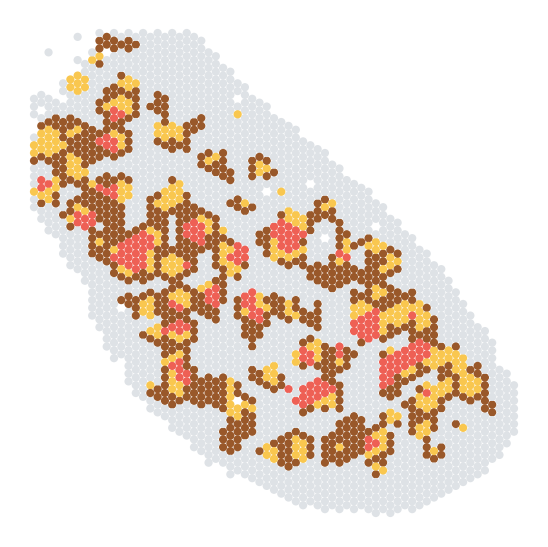

Plot SpaKnit - smooth:


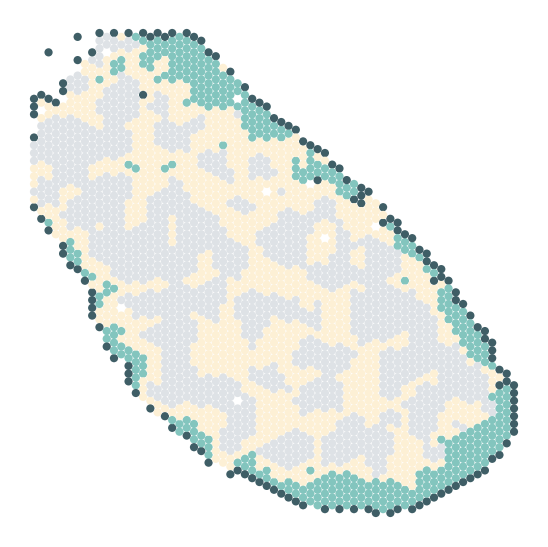

Plot SpatialGlue - vesicular:


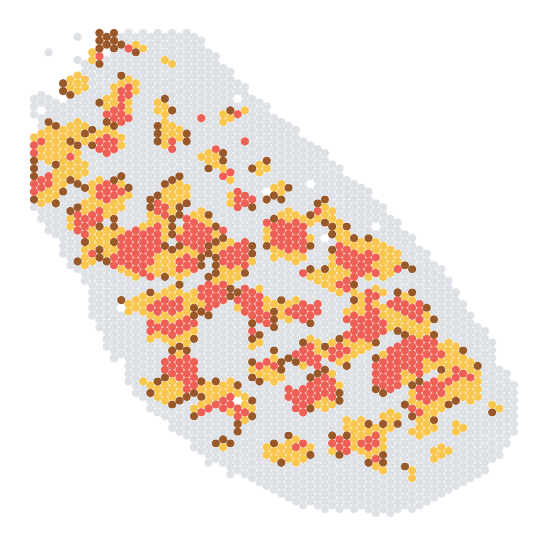

Plot SpatialGlue - smooth:


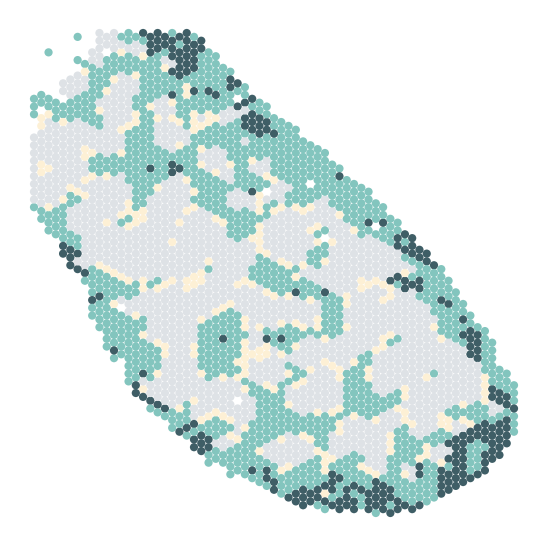

Plot SpaGCN - vesicular:


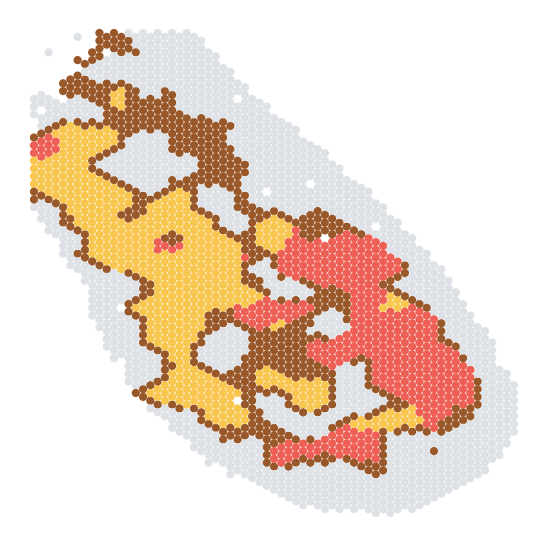

Plot SpaGCN - smooth:


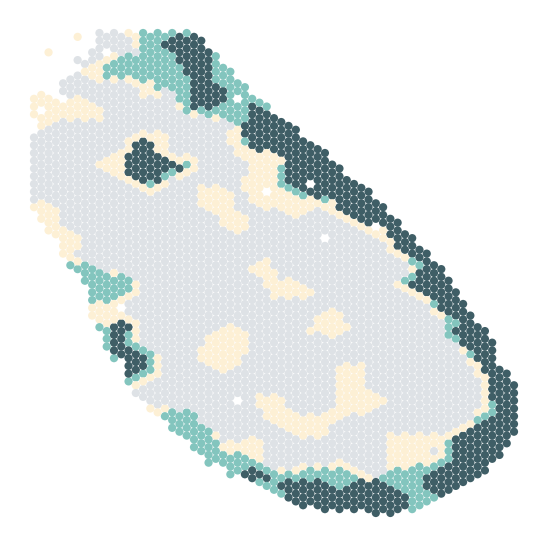

Plot STAGATE - vesicular:


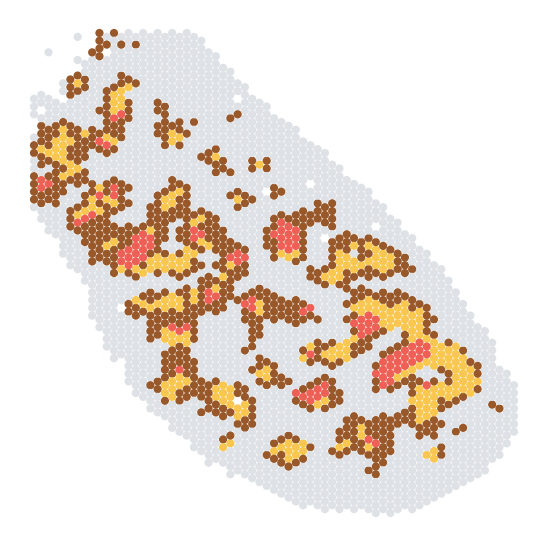

Plot STAGATE - smooth:


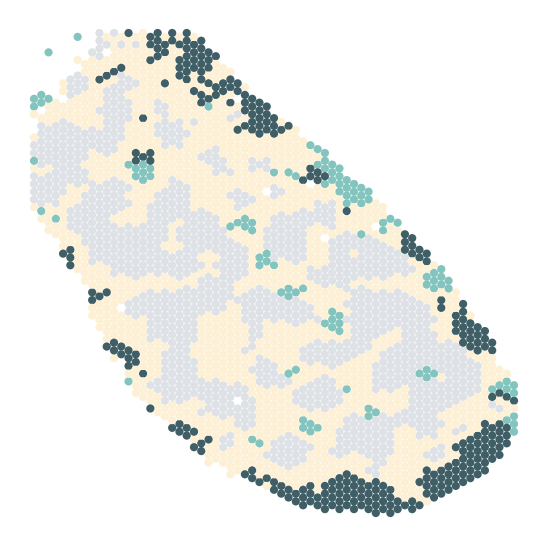

In [13]:
for result in result_key:
    for mode in ['vesicular', 'smooth']:  # Draw two subplots for each method
        print(f"Plot {result} - {mode}:")
        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        
        # Modify the colors based on the mode
        modified_colors = modify_colors(colors_domain[result], mode)
        
        sc.pl.embedding(adata_results, basis='spatial', color=[result], ax=ax, s=140, show=False, palette=modified_colors)
        ax.set_title(f"")
        ax.set_xlabel('')
        ax.set_ylabel('')

        ax.get_legend().remove()

        # Hide axis borders
        for spine in ax.spines.values():
            spine.set_visible(False)

        # Adjust subplot parameters
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        plt.tight_layout()

        # Save with a unique name for each mode
        plt.savefig(f'{save_path}{mode}_{result}.png', dpi=500)
        plt.savefig(f'{save_path}{mode}_{result}.eps')

        plt.show()